<a href="https://colab.research.google.com/github/kram12/Tech-fundamentals-project/blob/master/Bike%20Sharing%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files



In [79]:
uploaded = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [80]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


User uploaded file "test.csv" with length 323856 bytes
User uploaded file "train.csv" with length 648353 bytes


In [0]:
import io
df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))





In [0]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

##creates pandas dataframe for train and test 
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [84]:
df_train.isnull().sum()  #checks to see whether there are any null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

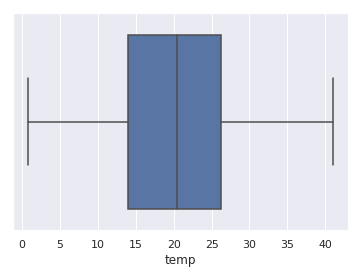

In [85]:
sns.boxplot(x=df_train["temp"])

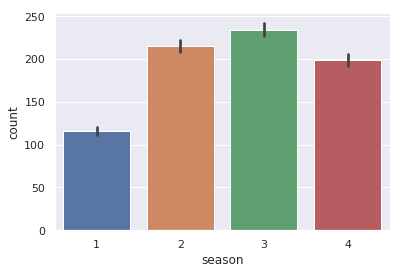

In [86]:
sns.barplot(x="season", y="count", data=df_train); ##creates a barchart to compare the season and count

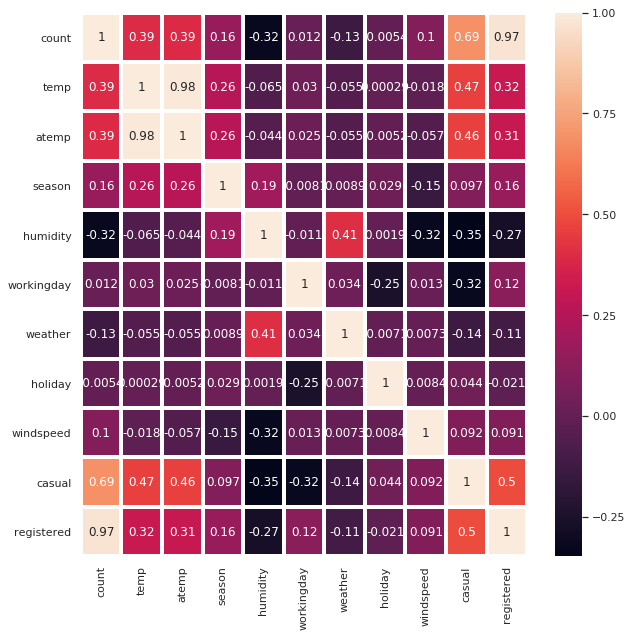

In [87]:
mp = df_train[["count",'temp','atemp',"season","humidity","workingday",'weather','holiday',
              'windspeed','casual','registered']].corr()

fig, ax = plt.subplots(figsize=(10,10))   ## shows the relationship between variables 
sns.heatmap(mp, linewidths=3, annot=True, ax=ax)

In [0]:
import calendar
import datetime
###converts the datetime into year, month and day into separate columns  for the train dataset
df_train['year'] = pd.DatetimeIndex(df_train['datetime']).year
df_train['month'] = pd.DatetimeIndex(df_train['datetime']).month
df_train['day'] = pd.DatetimeIndex(df_train['datetime']).day
df_train['hour'] = pd.DatetimeIndex(df_train['datetime']).hour
df_train= df_train.drop(columns=['datetime'])  



In [0]:
###converts the datetime into year, month and day into separate columns  for the test dataset

df_test['year'] = pd.DatetimeIndex(df_test['datetime']).year
df_test['month'] = pd.DatetimeIndex(df_test['datetime']).month
df_test['day'] = pd.DatetimeIndex(df_test['datetime']).day
df_test['hour'] = pd.DatetimeIndex(df_test['datetime']).hour
df_test = df_test.drop(columns=['datetime'])  


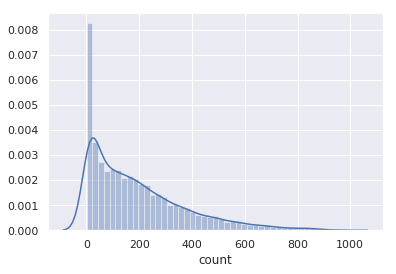

In [90]:
sns.distplot(df_train['count'])  ##creates a distplot of the count column

In [0]:
#sns.pairplot(df_train) #correlation of the variables and the count
## shows the histogram of each

In [0]:
###feature creation for the season and weather for the test dataset
test_season = pd.get_dummies(df_test['season'],prefix= 'season_')
test_weather = pd.get_dummies(df_test['weather'],prefix= 'weather_')


In [0]:
'''
cat_name = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
for i in df_train['season']:
    df_train[cat_name[i]] = df_train['season'] == i
    
df_train
'''
###feature creation for the season and weather for the train dataset
train_season = pd.get_dummies(df_train['season'],prefix= 'season_')
train_weather = pd.get_dummies(df_train['weather'],prefix= 'weather_')



In [94]:
model_final = df_train.join(train_season) 
model_final = model_final.join(train_weather)  ##concatantes the weather and season dummy 
model_final = model_final.drop(['season','weather','casual','registered'],axis=1) ##drops season and weather which features were created
##drops casual and registered which has high correlation with count and will affect the model 

model_final.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,0,0,9.84,14.395,81,0.0,16,2011,1,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,1,1,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,1,1,2,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,1,1,3,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,1,1,4,1,0,0,0,1,0,0,0


In [95]:
model_final_test = df_test.join(test_season)
model_final_test= model_final_test.join(test_weather)  ##concatantes the weather and season dummy 
model_final_test = model_final_test.drop(['season','weather'],axis=1)
model_final_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4
0,0,1,10.66,11.365,56,26.0027,2011,1,20,0,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,2011,1,20,2,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,2011,1,20,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,2011,1,20,4,1,0,0,0,1,0,0,0


In [0]:
#from google.colab import files

#model_final.to_csv('df.csv')
#files.download('df.csv')

In [0]:

#df_train_f = df_train.drop(columns=['count'])  ##drop the count variable
#df_train_f

In [0]:
pd.DataFrame( list(zip(X.columns, model.coef_)),
            columns=['features', 'estimatedCoeffs'])


Modeling 


In [0]:
##basic model that uses 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

X= model_final[['temp']]
y= model_final['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)



In [161]:
model = LinearRegression()     ###basic linear regression
model.fit( X_train, y_train )
pred_test = model.predict(X_test)
rmsle_basic_test = np.sqrt(mean_squared_log_error(pred_test,y_test))
print(rmsle_basic_test)


1.4652461657010165


In [0]:
from sklearn.model_selection  import train_test_split

X= model_final.drop(columns=['count']) 
y= model_final['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [155]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()      
model.fit(X_train, y_train)
pred_test_ada= model.predict(X_test)

rmsle_ada = np.sqrt(mean_squared_log_error(pred_test_ada,y_test))
print(rmsle_ada)

1.0440287586838175


In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
pred_test_y = regr.predict(X_test)

rmsle_random_forest = np.sqrt(mean_squared_log_error(pred_test_y,y_test))
print(rmsle_random_forest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.38048578035457475


In [182]:
from sklearn.ensemble import GradientBoostingRegressor 

model = GradientBoostingRegressor()

model.fit(X_train, y_train)
pred_test_gbr= model.predict(X_test)
rmsle_random_gbr = np.sqrt(mean_squared_log_error(pred_test_gbr,y_test))
print(rmsle_random_gbr)

1.4581235089741862
